# Alphavantage Intraday
* API for "real time" stock data
* Freeium model - sign up fro free account to get API key
* Can make API calls directly or install the helper library:
pip install alpha_vantage from the command line

#### https://alphavantage.co

### 1. Set up Environment

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

### 2. Store API Key

In [12]:
# replace with your own API key
key = open('1-alphavantage.txt').read()

### 3. Create TimeSeries Object and Make API Call

In [24]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('NSA', interval='30min', outputsize='full')

### 4. Examine Data

In [25]:
meta

{'1. Information': 'Intraday (30min) open, high, low, close prices and volume',
 '2. Symbol': 'NSA',
 '3. Last Refreshed': '2022-03-28 16:30:00',
 '4. Interval': '30min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414 entries, 2022-03-28 16:30:00 to 2022-02-15 10:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    414 non-null    float64
 1   2. high    414 non-null    float64
 2   3. low     414 non-null    float64
 3   4. close   414 non-null    float64
 4   5. volume  414 non-null    float64
dtypes: float64(5)
memory usage: 19.4 KB


In [28]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-28 16:30:00,62.2500,62.2500,62.2500,62.2500,5523.0
2022-03-28 16:00:00,62.1600,62.2500,62.0300,62.2500,71746.0
2022-03-28 15:30:00,62.2900,62.3000,62.0900,62.1500,19945.0
2022-03-28 15:00:00,62.2550,62.3600,62.1500,62.3200,16391.0
2022-03-28 14:30:00,62.4350,62.5400,62.1700,62.2600,19446.0
...,...,...,...,...,...
2022-02-15 12:00:00,59.5184,59.7366,59.4986,59.7366,10462.0
2022-02-15 11:30:00,60.0539,60.1531,59.4787,59.4986,22035.0
2022-02-15 11:00:00,60.0539,60.3464,60.0142,60.0936,22501.0


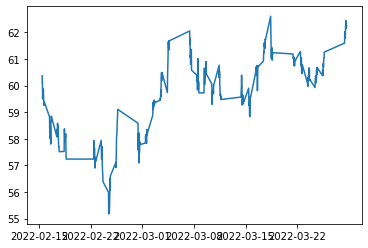

In [30]:
plt.plot(data['4. close'])

### 5. Rename Columns and Add Separate Date and Time Columns

In [32]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [33]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [ ]:
data.loc['2020-12-31']

In [34]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 381 entries, 2022-02-15 10:00:00 to 2022-03-28 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       381 non-null    float64
 1   high       381 non-null    float64
 2   low        381 non-null    float64
 3   close      381 non-null    float64
 4   volume     381 non-null    float64
 5   TradeDate  381 non-null    object 
 6   time       381 non-null    object 
dtypes: float64(5), object(2)
memory usage: 23.8+ KB


In [35]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2022-02-15,59.0325,61.3629
2022-02-16,57.5153,59.6077
2022-02-17,57.6541,58.6458
2022-02-18,57.2376,58.5992
2022-02-22,56.7220,58.1698
2022-02-23,56.2361,58.0805
2022-02-24,54.9569,56.7716
2022-02-25,56.6228,59.1515
2022-02-28,56.9501,58.9433


In [36]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-02-15 16:00:00,59.3102,59.4292,59.0325,59.2606,117093.0,2022-02-15,16:00:00
2022-02-16 14:00:00,58.1103,58.1499,57.5153,57.8029,406189.0,2022-02-16,14:00:00
2022-02-17 16:00:00,57.7037,58.0210,57.6541,57.7136,132041.0,2022-02-17,16:00:00
2022-02-18 16:00:00,57.5153,57.6839,57.2376,57.2376,139870.0,2022-02-18,16:00:00
2022-02-22 10:00:00,57.2178,58.1698,56.7220,57.9318,37989.0,2022-02-22,10:00:00
2022-02-23 16:00:00,56.5038,56.5336,56.2361,56.4146,176517.0,2022-02-23,16:00:00
2022-02-24 10:00:00,55.4328,56.2658,54.9569,55.9882,55593.0,2022-02-24,10:00:00
2022-02-25 10:30:00,57.1087,57.3467,56.6228,56.9203,24390.0,2022-02-25,10:30:00
2022-02-28 13:00:00,57.0790,57.5450,56.9501,57.5450,17665.0,2022-02-28,13:00:00


In [37]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-02-15 10:00:00,60.7976,61.3629,60.3216,60.3712,18631.0,2022-02-15,10:00:00
2022-02-16 10:00:00,59.5977,59.6077,58.8193,58.8193,10586.0,2022-02-16,10:00:00
2022-02-17 10:00:00,58.6358,58.6458,57.9714,58.0706,30798.0,2022-02-17,10:00:00
2022-02-18 10:30:00,58.4673,58.5992,58.2789,58.3780,18524.0,2022-02-18,10:30:00
2022-02-22 10:00:00,57.2178,58.1698,56.7220,57.9318,37989.0,2022-02-22,10:00:00
2022-02-23 10:00:00,57.4161,58.0805,57.2277,57.9417,71292.0,2022-02-23,10:00:00
2022-02-24 16:00:00,56.0477,56.7716,56.0278,56.5931,180733.0,2022-02-24,16:00:00
2022-02-25 16:00:00,58.8540,59.1515,58.7251,59.1118,103500.0,2022-02-25,16:00:00
2022-02-28 10:00:00,58.6953,58.9433,57.6640,58.5863,32142.0,2022-02-28,10:00:00


# My understanding